In [17]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [18]:
df = pd.read_csv(r"C:\Users\hi\OneDrive\Desktop\diamonds.csv")

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [19]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [20]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [21]:
df.shape[0]

53940

In [22]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [23]:
df.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [24]:
df.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [25]:
X = df[['carat', 'depth', 'table', 'x', 'y', 'z','cut','color','clarity']]
y = df['price']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(43152, 9) (43152,)
(10788, 9) (10788,)


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [30]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,carat,depth,table,x,y,z
441,0.194920,-1.085697,0.694368,0.472201,0.430971,0.312528
50332,-0.205679,1.567623,-1.997562,-0.142482,-0.107276,0.058918
35652,-1.027961,0.659908,-0.202942,-1.247129,-1.235860,-1.166861
9439,0.216004,0.380611,0.694368,0.347483,0.378883,0.411154
15824,0.447930,-0.806400,2.040332,0.703821,0.656688,0.566137


In [33]:
X_train_cat_transformed = pd.DataFrame(index=X_train_cat.index)

X_train_cat_transformed.head()

""
441
50332
35652
9439
15824


In [34]:
cut_encoder = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5}
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
clarity_encoder = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

# Apply Label Encoding
X_train_cat_transformed['cut'] = X_train_cat['cut'].map(cut_encoder)
X_train_cat_transformed['color'] = X_train_cat['color'].map(color_encoder)
X_train_cat_transformed['clarity'] = X_train_cat['clarity'].map(clarity_encoder)

X_train_cat_transformed.head()

,cut,color,clarity
441,5,3,2
50332,3,7,3
35652,4,4,6
9439,3,3,5
15824,2,5,4


In [35]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis=1)

X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
441,0.194920,-1.085697,0.694368,0.472201,0.430971,0.312528,5,3,2
50332,-0.205679,1.567623,-1.997562,-0.142482,-0.107276,0.058918,3,7,3
35652,-1.027961,0.659908,-0.202942,-1.247129,-1.235860,-1.166861,4,4,6
9439,0.216004,0.380611,0.694368,0.347483,0.378883,0.411154,3,3,5
15824,0.447930,-0.806400,2.040332,0.703821,0.656688,0.566137,2,5,4


In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

classifier = DecisionTreeRegressor()
classifier.fit(X_train_transformed, y_train)


DecisionTreeRegressor()

In [37]:
classifier.feature_importances_

array([0.62662704, 0.00349129, 0.00265862, 0.00490818, 0.26168972,
       0.0037843 , 0.0014295 , 0.0317832 , 0.06362816])

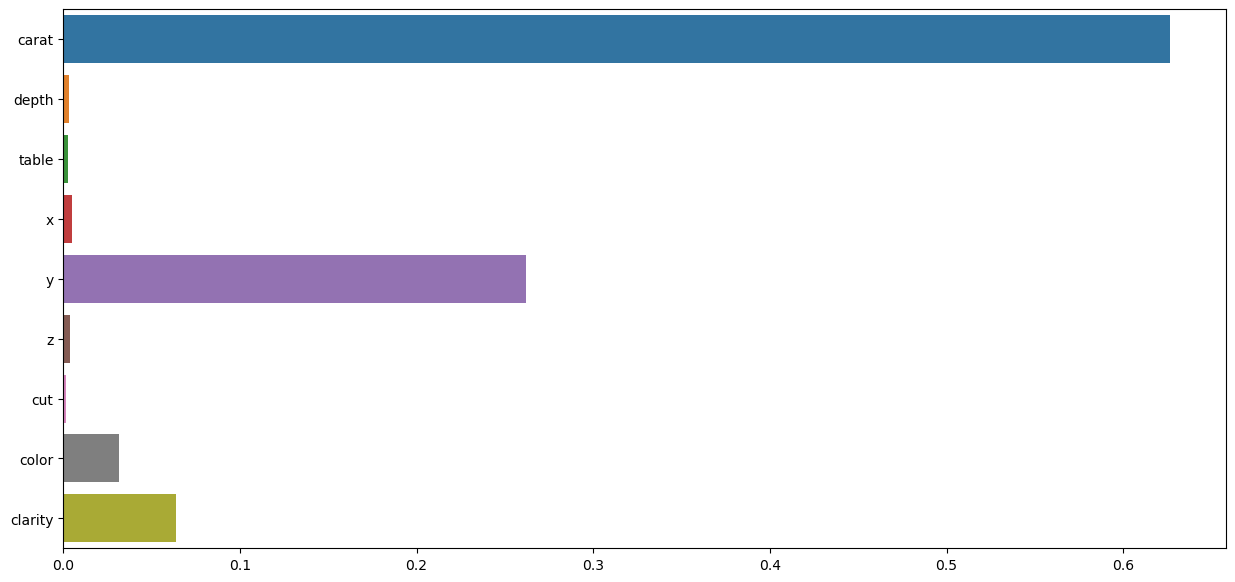

In [38]:
plt.figure(figsize=(15,7))

sns.barplot(x=classifier.feature_importances_, y=X_train.columns)

plt.show()